In [1]:
from datasets import load_dataset
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\jorgen\miniconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
vg_ds = load_dataset("jkorsvik/cnn_daily_mail_nor_final")

In [3]:
train = vg_ds["train"]

In [4]:
# convert train to a pandas dataframe
train_df = train.to_pandas()

In [12]:
# convert published column in train_df to datetime
train_df["published"] = pd.to_datetime(train_df["published"])

<AxesSubplot:title={'center':'Number of articles published per year'}, xlabel='published'>

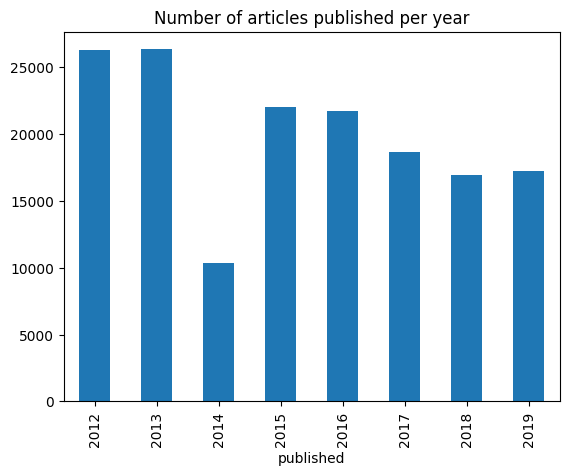

In [15]:
# group by published yearly and plot the number of articles for each day with a bar plot. With the title "Number of articles published per year"
train_df.groupby(train_df["published"].dt.year).size().plot(kind="bar", title="Number of articles published per year")

In [13]:
np.unique(train["classes"], return_counts=True)

(array([',www.vg.no,nyheter,innenriks',
        ',www.vg.no,nyheter,innenriks,22-juli,rettssaken',
        ',www.vg.no,nyheter,innenriks,norsk-politikk', ...,
        'sport,zlatan-ibrahimovic', 'teknologi', 'www.vg.no'], dtype='<U64'),
 array([  5,   4,   1, ...,   1, 636,   5], dtype=int64))

In [17]:
# Add two columns to train_df with the number of characters in the ingress and article
train_df["ingress_length"] = train_df["ingress"].str.len() 
train_df["article_length"] = train_df["article"].str.len() 

In [30]:
# Mean and meadiian of the number of characters in the ingress and article
print("Mean number of characters in the ingress: ", train_df["ingress_length"].mean())
print("Median number of characters in the ingress: ", train_df["ingress_length"].median())
print("Mean number of characters in the article: ", train_df["article_length"].mean())
print("Median number of characters in the article: ", train_df["article_length"].median())

Mean number of characters in the ingress:  138.70049787431495
Median number of characters in the ingress:  134.0
Mean number of characters in the article:  2664.093348298825
Median number of characters in the article:  2386.0


Text(0.5, 0.98, 'Distribution of number of characters in ingress and article')

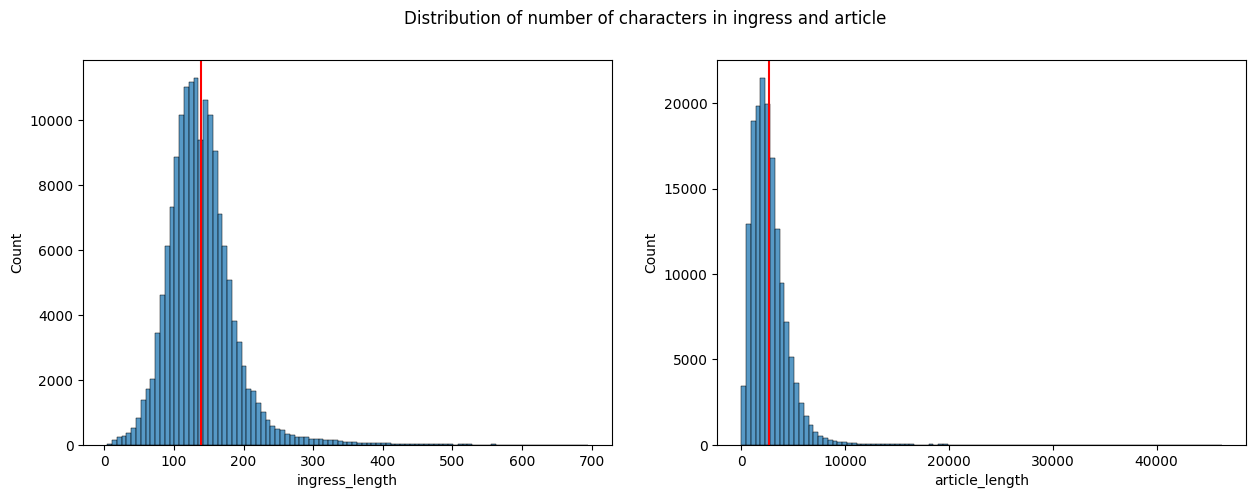

In [25]:
# Plot the disributions of the number of characters in the ingress and article with a binned histogram. The two plot stacked horizontally. Add a vertical line at the mean of the distributions. Add a title to the plot.
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(train_df["ingress_length"], ax=ax[0], bins=100)
sns.histplot(train_df["article_length"], ax=ax[1], bins=100)
ax[0].axvline(train_df["ingress_length"].mean(), color="red")
ax[1].axvline(train_df["article_length"].mean(), color="red")
fig.suptitle("Distribution of number of characters in ingress and article")




Text(0.5, 0.98, 'Distribution of number of characters in ingress and article')

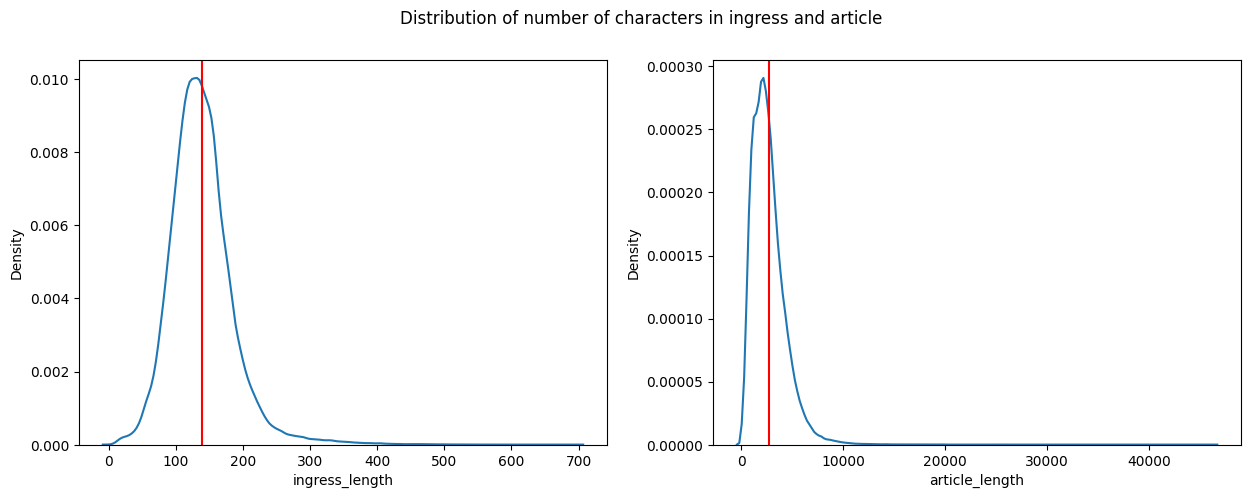

In [31]:
# Density plot of the number of characters in the ingress and article. Add a vertical line at the mean of the distributions. Add a title to the plot.
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.kdeplot(train_df["ingress_length"], ax=ax[0])
sns.kdeplot(train_df["article_length"], ax=ax[1])
ax[0].axvline(train_df["ingress_length"].mean(), color="red")
ax[1].axvline(train_df["article_length"].mean(), color="red")
fig.suptitle("Distribution of number of characters in ingress and article")


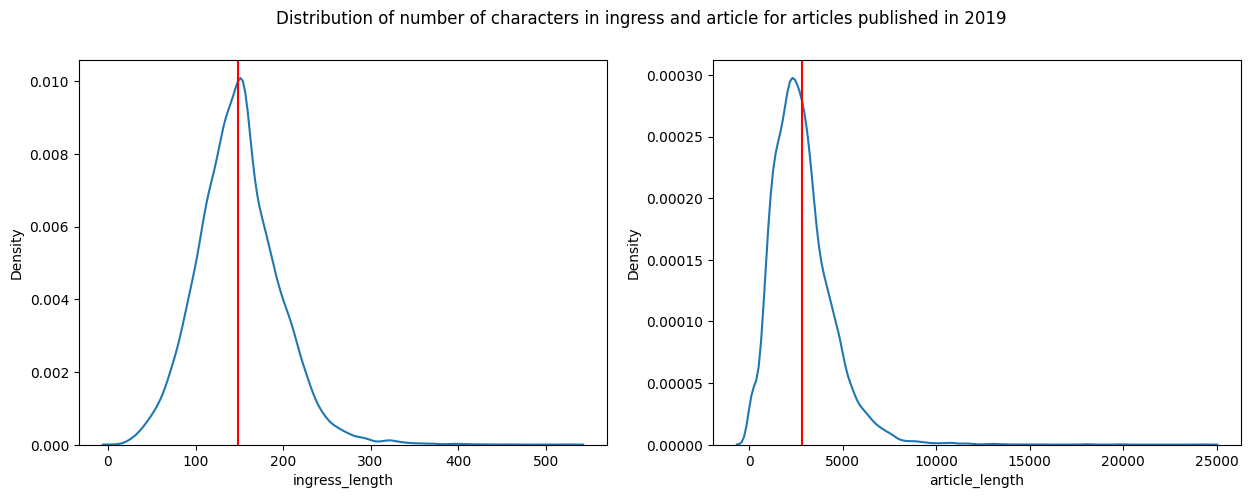

In [33]:
# function to create a plot of the distribution of the number of characters in the ingress and article and call it with the train_df and the title "Distribution of number of characters in ingress and article"
def plot_ingress_article(df, title):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.kdeplot(df["ingress_length"], ax=ax[0])
    sns.kdeplot(df["article_length"], ax=ax[1])
    ax[0].axvline(df["ingress_length"].mean(), color="red")
    ax[1].axvline(df["article_length"].mean(), color="red")
    fig.suptitle(title)

# Plot the distribution of the number of characters in the ingress and article for the articles published in 2019
plot_ingress_article(train_df[train_df["published"].dt.year == 2019], "Distribution of number of characters in ingress and article for articles published in 2019")
